In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
file_path = "go_track_tracks.csv"
df = pd.read_csv(file_path)
df.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [3]:
df = df.select_dtypes(include=[np.number]).dropna()

X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

lr_pca = LinearRegression()
lr_pca.fit(X_pca_train, y_train)
y_pred_pca = lr_pca.predict(X_pca_test)

In [4]:
r2_original = r2_score(y_test, y_pred_original)
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))

r2_pca = r2_score(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

print("R2 Original:", r2_original)
print("RMSE Original:", rmse_original)
print("R2 PCA:", r2_pca)
print("RMSE PCA:", rmse_pca)

R2 Original: 0.4536613357527902
RMSE Original: 0.3694039035562187
R2 PCA: 0.11602948561898774
RMSE PCA: 0.4698826416123009


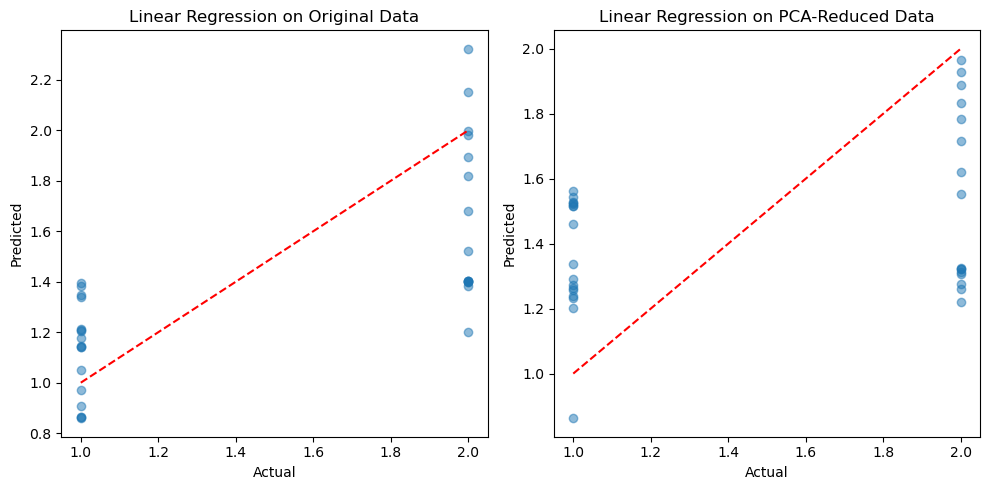

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_original, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression on Original Data")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_pca, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression on PCA-Reduced Data")

plt.tight_layout()
plt.show()